In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def extract_data_from_logs(path):
    with open(path) as f:
        lines = f.readlines()
    
    lines = [line.strip() for line in lines if 'Logging to' not in line]
    stats_tokens= [line.split() for line in lines if 'stats' in line]
    normal_tokens = [line.replace('=', ' ').split() for line in lines if 'stats' not in line]
    
    normal_data = [(int(tokens[2].rstrip(':')), float(tokens[4])) for tokens in normal_tokens]
    stats_data = [(tokens[4].rstrip(':'), int(tokens[2]), float(tokens[7])) for tokens in stats_tokens]
    train_data = [(entry[1], entry[2]) for entry in stats_data if entry[0] == 'train']
    val_data = [(entry[1], entry[2]) for entry in stats_data if entry[0] == 'val']
    
    return np.array(train_data), np.array(val_data), np.array(normal_data)

In [82]:
path = 'logdir/pol_spider_mix_bert_run/bs=6,lr=7.4e-04,bert_lr=3.0e-06,end_lr=0e0,att=1/log.txt'
train, val, data = extract_data_from_logs(path)
train.shape, val.shape, data.shape

((405, 2), (405, 2), (4034, 2))

[(0.0, 10.0)]

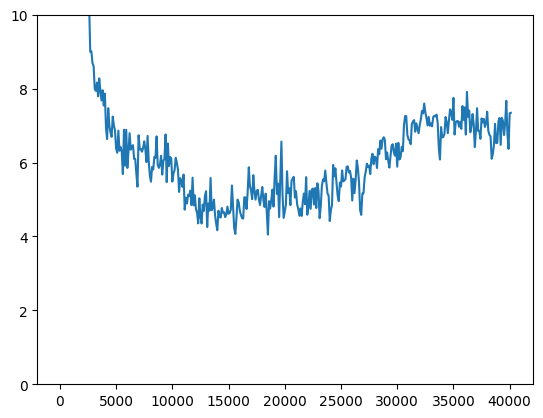

In [83]:
plt.plot(val[:, 0], val[:, 1])
ax = plt.gca()
ax.set(ylim=(0, 10))

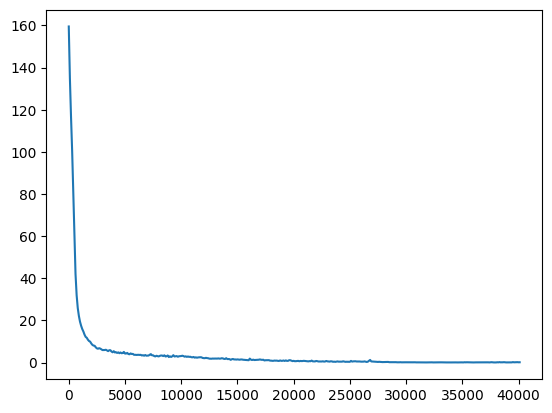

In [84]:
plt.plot(train[:, 0], train[:, 1])

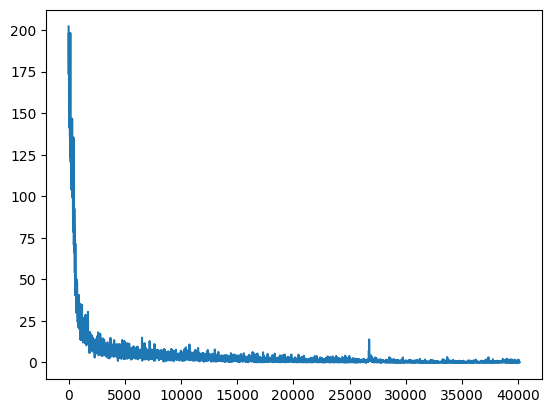

In [85]:
plt.plot(data[:, 0], data[:, 1])